Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir2.0\cluster_s1t1_0000
N =  70
time 2000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir2.0\cluster_s1t1_0000
N =  70
time 2000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir2.0\cluster_s1t1_0001
N =  70
time 4000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir2.0\cluster_s1t1_0002
N =  70
time 6000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir2.0\cluster_s1t1_0003
N =  70
time 8000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir2.0\cluster_s1t1_0004


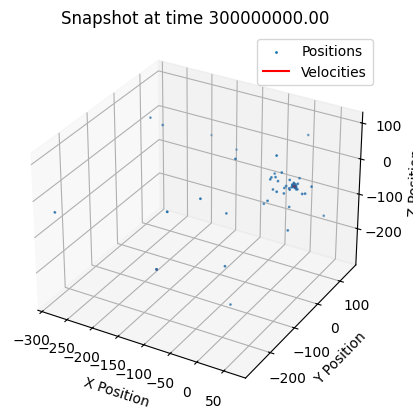

In [16]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter
from nbd_utils_code import nbd_read  # Assuming this is your provided code
from matplotlib.animation import PillowWriter

# Define the directory containing the snapshots
snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir2.0'

# List all snapshot files
snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

# Set up the figure, the axis, and the plot element to animate
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize scatter plot for positions and quiver plot for velocities
sc_positions = ax.scatter([], [], [], s=1, label='Positions')
quiver_velocities = ax.quiver([], [], [], [], [], [], length=0.1, normalize=True, color='r', label='Velocities')

# Labels and title
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.legend()

# Function to update the scatter plot and quiver plot for each frame
def update(frame):
    # Clear the axis
    ax.clear()

    # Read the data from the snapshot file
    filepath = os.path.join(snapshot_directory, snapshot_files[frame])
    data = nbd_read(filepath)

    # Update the scatter plot with new position data
    sc_positions = ax.scatter(data.x, data.y, data.z, s=1, label='Positions')

    # Update the quiver plot with new velocity data
    quiver_velocities = ax.quiver(data.x, data.y, data.z, data.vx, data.vy, data.vz, length=0.1, normalize=True, color='r', label='Velocities')

    # Update the title with the current time
    ax.set_title(f"Snapshot at time {data.time:.2f}")

    # Update the axis labels
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')

    # Re-add the legend
    ax.legend()



    

# Create the animation
ani = FuncAnimation(fig, update, frames=len(snapshot_files), repeat=True)

# To save the animation as a video file (e.g., MP4), specify ffmpeg writer:
writer = FFMpegWriter(fps=5, metadata=dict(artist='Me'), bitrate=1800)

ani.save('ani_rad1.0_vir2.0.Gif', writer=PillowWriter(fps=5))

# To display the animation
plt.show()


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read  


snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir'


snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])


times = []
distances_over_time = []


for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)

    times.append(data.time)

    x, y, z = data.x, data.y, data.z
    m = data.mass

    total_mass = np.sum(m)
    com_x = np.sum(m * x) / total_mass
    com_y = np.sum(m * y) / total_mass
    com_z = np.sum(m * z) / total_mass

    distances = np.sqrt((x - com_x)**2 + (y - com_y)**2 + (z - com_z)**2)
    distances_over_time.append(distances)

times = np.array(times)
distances_over_time = np.array(distances_over_time)  




Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0000
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0001
N =  70
time 1000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0002
N =  70
time 1500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0003
N =  70
time 2000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0004
N =  70
time 2500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster

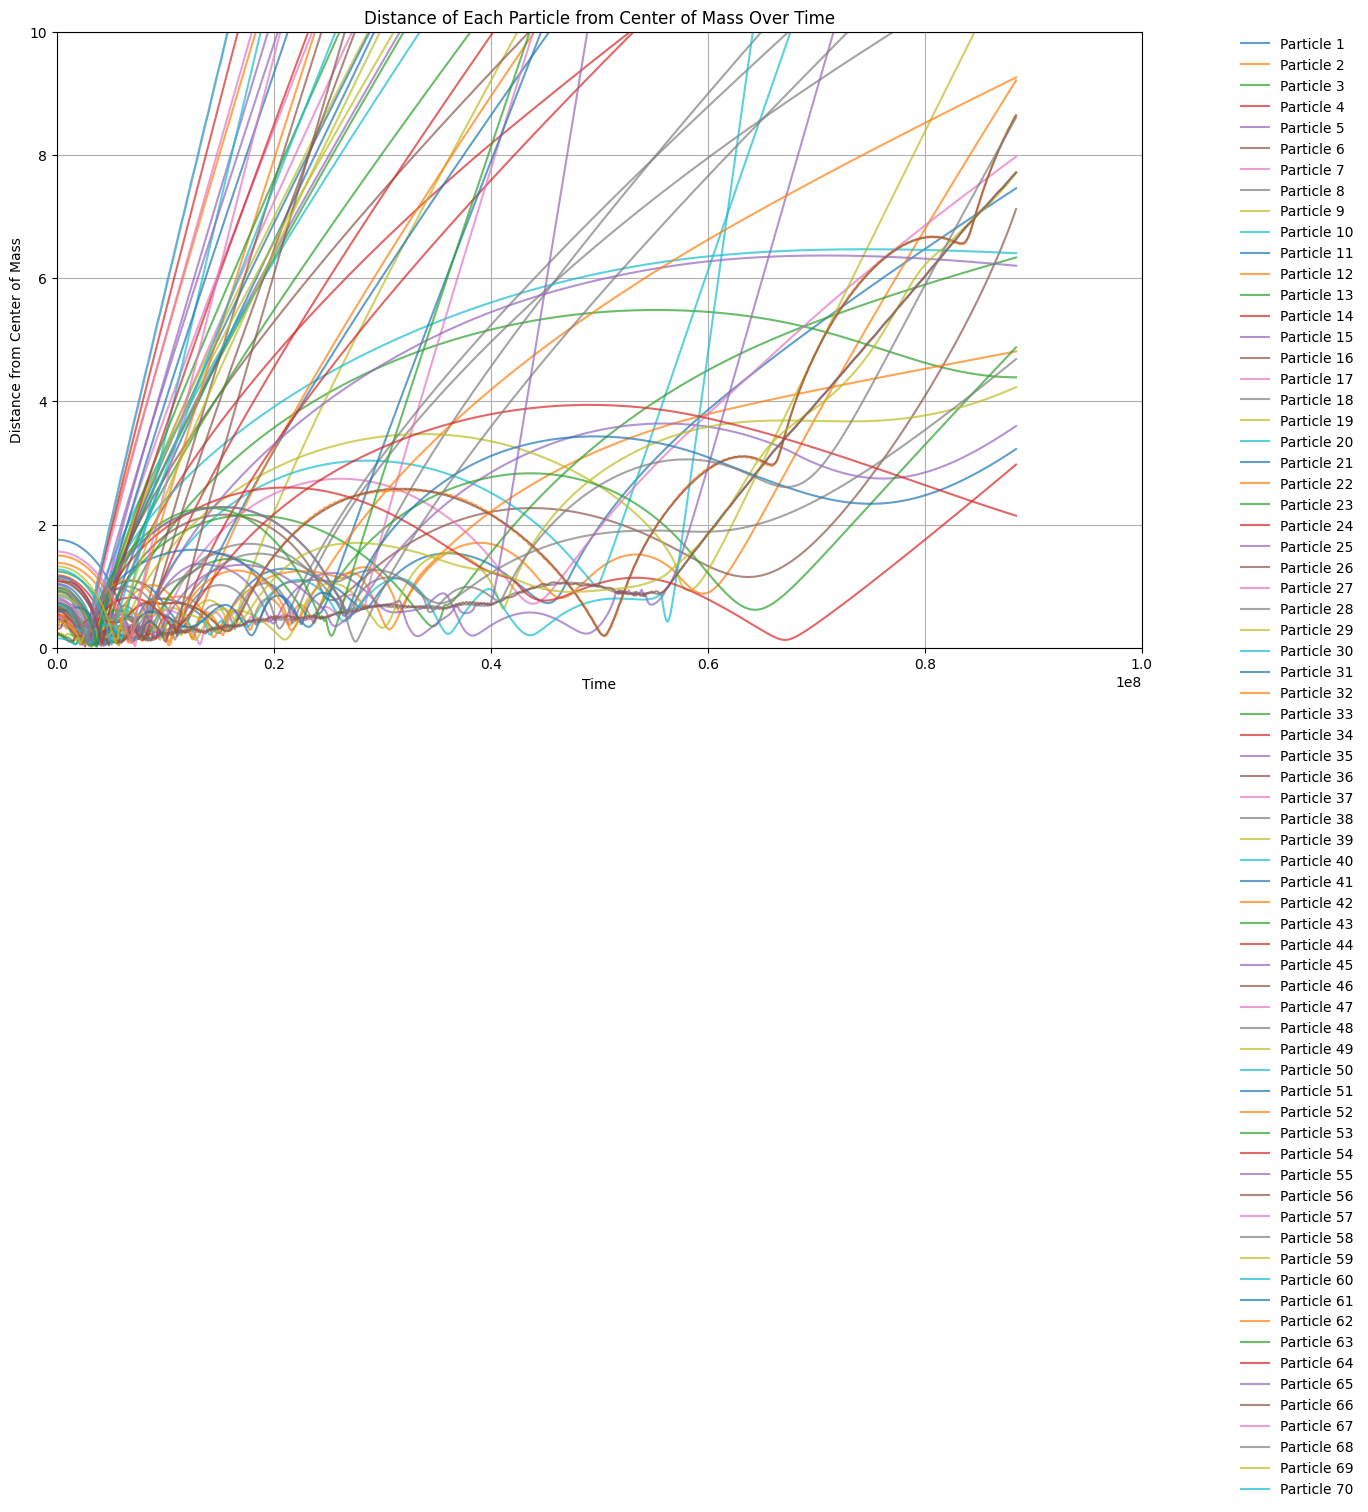

In [6]:

plt.figure(figsize=(14, 8))


for i in range(distances_over_time.shape[1]):  
    plt.plot(times, distances_over_time[:, i], label=f'Particle {i+1}', alpha=0.7)

plt.ylim(0,10)
plt.xlim(0, 0.1e9)
plt.xlabel('Time')
plt.ylabel('Distance from Center of Mass')
plt.title('Distance of Each Particle from Center of Mass Over Time')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1, borderaxespad=0., frameon=False)
plt.grid(True)
plt.show()

Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0000
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0001
N =  70
time 1000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0002
N =  70
time 1500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0003
N =  70
time 2000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0004
N =  70
time 2500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster

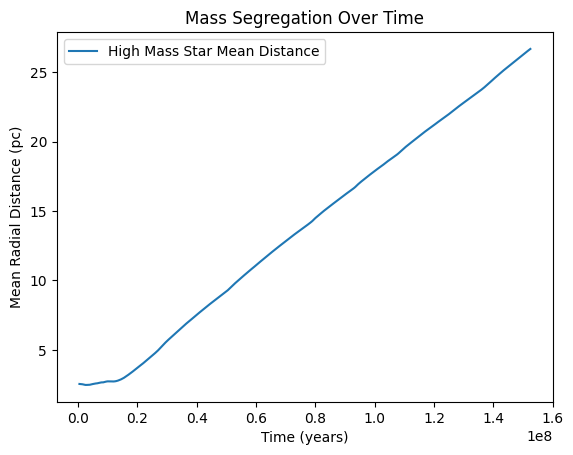

In [67]:
# Store data over time for plotting
times = []
distances_over_time = []

# Function to calculate distance
def calculate_distance(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

# Mass Segregation Analysis
def mass_segregation_analysis_over_time(snapshot_files):
    for snapshot_file in snapshot_files:
        filepath = os.path.join(snapshot_directory, snapshot_file)
        data = nbd_read(filepath)
        
        # Append time
        times.append(data.time)
        
        # Positions and masses
        r = calculate_distance(data.x, data.y, data.z)
        sorted_indices = np.argsort(data.mass)[::-1]
        high_mass_stars = sorted_indices[:int(len(data.mass) * 0.1)] 
        r_high_mass = r[high_mass_stars]

        distances_over_time.append(np.mean(r_high_mass))

    plt.plot(times, distances_over_time, label="High Mass Star Mean Distance")
    plt.xlabel('Time (years)')
    plt.ylabel('Mean Radial Distance (pc)')
    plt.title('Mass Segregation Over Time')
    plt.legend()
    plt.show()
mass_segregation_analysis_over_time(snapshot_files)

Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

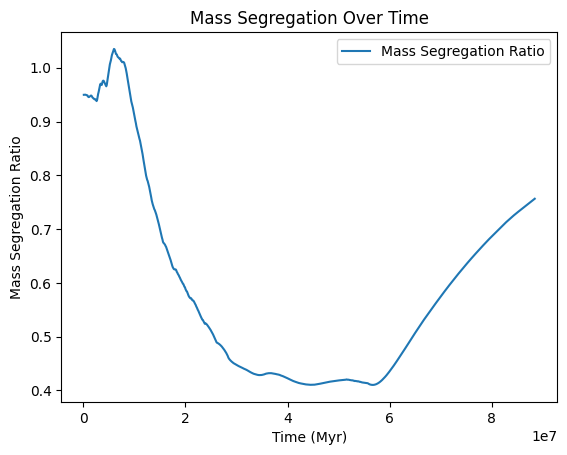

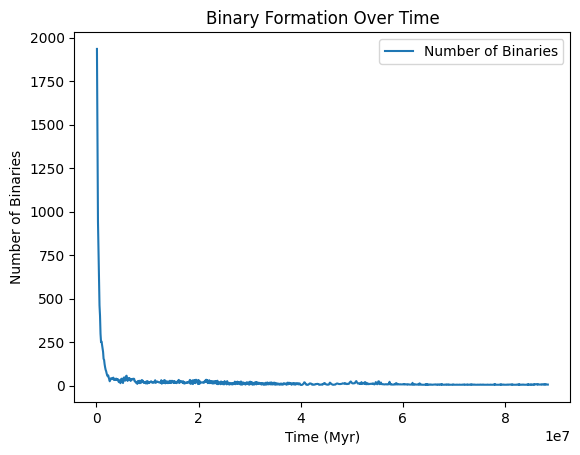

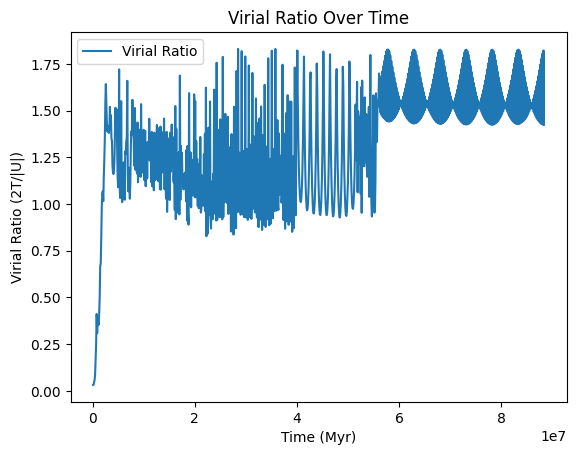

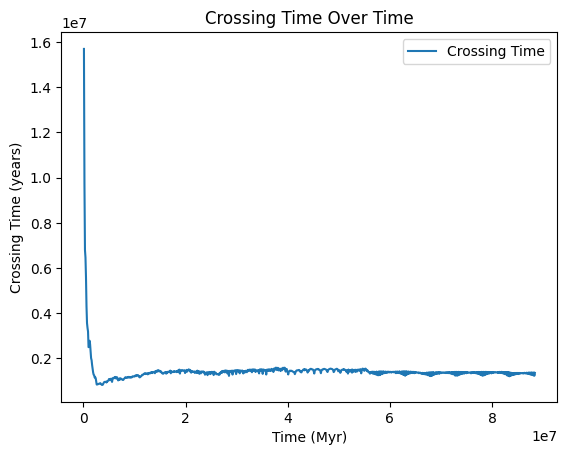

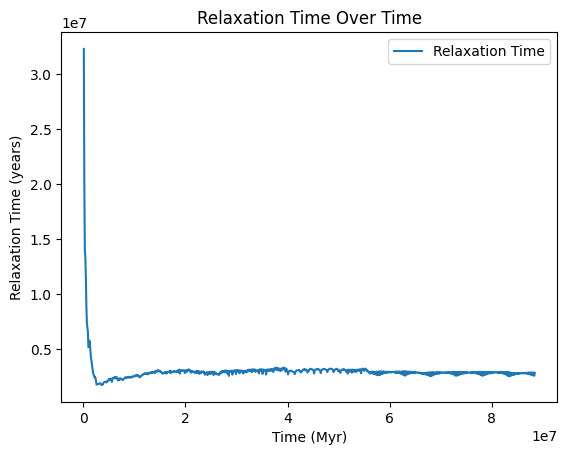

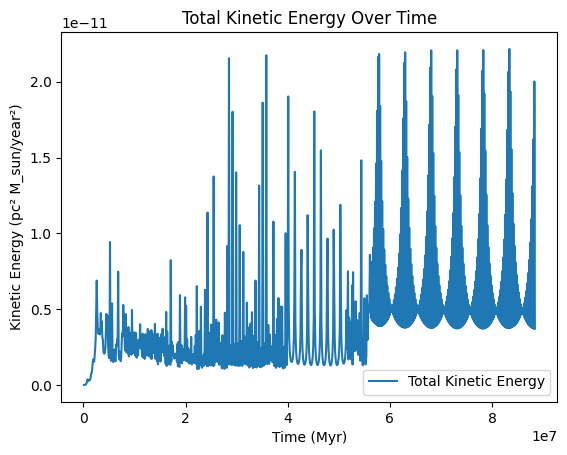

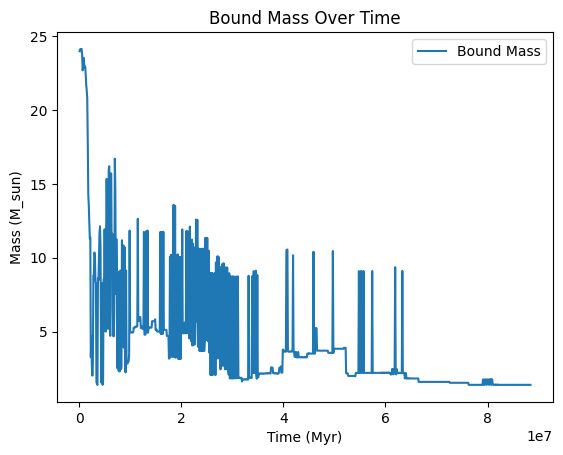

In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read   # Assuming you have a module for reading snapshots

# Path to the snapshot directory
snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir'

# Get a sorted list of snapshot files
snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

# Initialize time series lists to hold data across snapshots
times = []
mass_segregation_ratios = []
binary_counts = []
virial_ratios = []
crossing_times = []
relaxation_times = []
total_kinetic_energies = []
bound_masses = []

# Helper function to calculate distance
def calculate_distance(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

# Main loop to read snapshots and analyze data
for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)
    
    # Extract time and positions
    times.append(data.time)
    x, y, z = data.x, data.y, data.z
    vx, vy, vz = data.vx, data.vy, data.vz
    m = data.mass

    # Method 1: Mass Segregation
    def mass_segregation_analysis():
        r = calculate_distance(x, y, z)
        sorted_indices = np.argsort(m)[::-1]
        high_mass_stars = sorted_indices[:int(len(m) * 0.1)]
        r_high_mass = r[high_mass_stars]
        avg_r_high_mass = np.mean(r_high_mass)
        avg_r_all = np.mean(r)
        return avg_r_high_mass / avg_r_all

    # Method 2: Binary Formation and Evolution
    def identify_binaries(G=4.4969032492703040E-015):
        binaries = []
        for i in range(data.N):
            for j in range(i+1, data.N):
                r_ij = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
                v_ij = np.sqrt((vx[i] - vx[j])**2 + (vy[i] - vy[j])**2 + (vz[i] - vz[j])**2)
                mu = m[i] * m[j] / (m[i] + m[j])
                E_bind = 0.5 * mu * v_ij**2 - G * m[i] * m[j] / r_ij
                if E_bind < 0:
                    binaries.append((i, j))
        return len(binaries)

    # Method 3: Virial Ratio
    def virial_ratio(G=4.4969032492703040E-015):
        T = 0.5 * np.sum(m * (vx**2 + vy**2 + vz**2))
        U = 0
        for i in range(data.N):
            for j in range(i+1, data.N):
                r_ij = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
                U -= G * m[i] * m[j] / r_ij
        return 2 * T / abs(U)

    # Method 4: Crossing Time
    def crossing_time(R=0.5):
        v_avg = np.mean(np.sqrt(vx**2 + vy**2 + vz**2))
        return R / v_avg

    # Method 5: Relaxation Time
    def relaxation_time():
        t_cross = crossing_time()
        N = data.N
        return (N / (8 * np.log(N))) * t_cross

    # Method 6: Kinetic Energy
    def track_energy():
        kinetic_energy = 0.5 * m * (vx**2 + vy**2 + vz**2)
        return np.sum(kinetic_energy)

    # Method 7: Bound Mass
    def bound_mass(G=4.4969032492703040E-015):
    # Total mass of the cluster
      total_mass = np.sum(m)

    # Calculate distances from the center of mass of the cluster
      r = calculate_distance(x, y, z)
      r_avg = np.mean(r)  # Estimate of the average cluster radius

    # Escape velocity based on total mass and average radius
      v_esc = np.sqrt(2 * G * total_mass / r_avg)

    # Calculate velocities of stars
      velocities = np.sqrt(vx**2 + vy**2 + vz**2)

    # Identify bound stars (those with velocity less than escape velocity)
      bound_stars = velocities < v_esc

    # Sum the mass of bound stars
      bound_mass_value = np.sum(m[bound_stars])
      return bound_mass_value

    # Perform calculations for the current snapshot
    msr = mass_segregation_analysis()
    binary_count = identify_binaries()
    virial_ratio_value = virial_ratio()
    crossing_time_value = crossing_time()
    relaxation_time_value = relaxation_time()
    total_kinetic_energy = track_energy()
    bound_mass_value = bound_mass()

    # Append the results to the respective time series lists
    mass_segregation_ratios.append(msr)
    binary_counts.append(binary_count)
    virial_ratios.append(virial_ratio_value)
    crossing_times.append(crossing_time_value)
    relaxation_times.append(relaxation_time_value)
    total_kinetic_energies.append(total_kinetic_energy)
    bound_masses.append(bound_mass_value)

# Plotting the results over time

# Mass Segregation
plt.figure()
plt.plot(times, mass_segregation_ratios, label="Mass Segregation Ratio")
plt.xlabel("Time (Myr)")
plt.ylabel("Mass Segregation Ratio")
plt.title("Mass Segregation Over Time")
plt.legend()
plt.show()

# Binary Count
plt.figure()
plt.plot(times, binary_counts, label="Number of Binaries")
plt.xlabel("Time (Myr)")
plt.ylabel("Number of Binaries")
plt.title("Binary Formation Over Time")
plt.legend()
plt.show()

# Virial Ratio
plt.figure()
plt.plot(times, virial_ratios, label="Virial Ratio")
plt.xlabel("Time (Myr)")
plt.ylabel("Virial Ratio (2T/|U|)")
plt.title("Virial Ratio Over Time")
plt.legend()
plt.show()



# Crossing Time
plt.figure()
plt.plot(times, crossing_times, label="Crossing Time")
plt.xlabel("Time (Myr)")
plt.ylabel("Crossing Time (years)")
plt.title("Crossing Time Over Time")
plt.legend()
plt.show()

# Relaxation Time
plt.figure()
plt.plot(times, relaxation_times, label="Relaxation Time")
plt.xlabel("Time (Myr)")
plt.ylabel("Relaxation Time (years)")
plt.title("Relaxation Time Over Time")
plt.legend()
plt.show()

# Total Kinetic Energy
plt.figure()
plt.plot(times, total_kinetic_energies, label="Total Kinetic Energy")
plt.xlabel("Time (Myr)")
plt.ylabel("Kinetic Energy (pc² M_sun/year²)")
plt.title("Total Kinetic Energy Over Time")
plt.legend()
plt.show()

# Bound Mass
plt.figure()
plt.plot(times, bound_masses, label="Bound Mass")
plt.xlabel("Time (Myr)")
plt.ylabel("Mass (M_sun)")
plt.title("Bound Mass Over Time")
plt.legend()
plt.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 100000.00 Myr, Total Binaries: 1935, Binaries Formed Since Last Snapshot: 1935
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 200000.00 Myr, Total Binaries: 1470, Binaries Formed Since Last Snapshot: -465
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 300000.00 Myr, Total Binaries: 943, Binaries Formed Since Last Snapshot: -527
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 400000.00 Myr, Total Binaries: 7

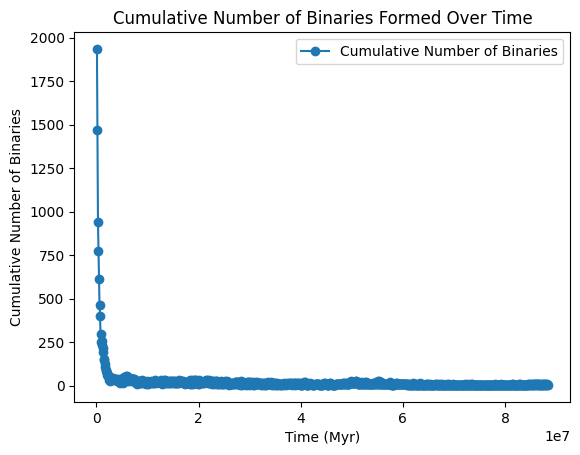

Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0883
N =  70
time 88400000.0
units 1.98847e+33 3.085677581e+18 31556952.0


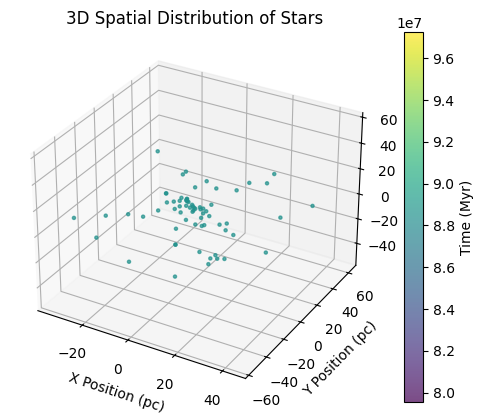

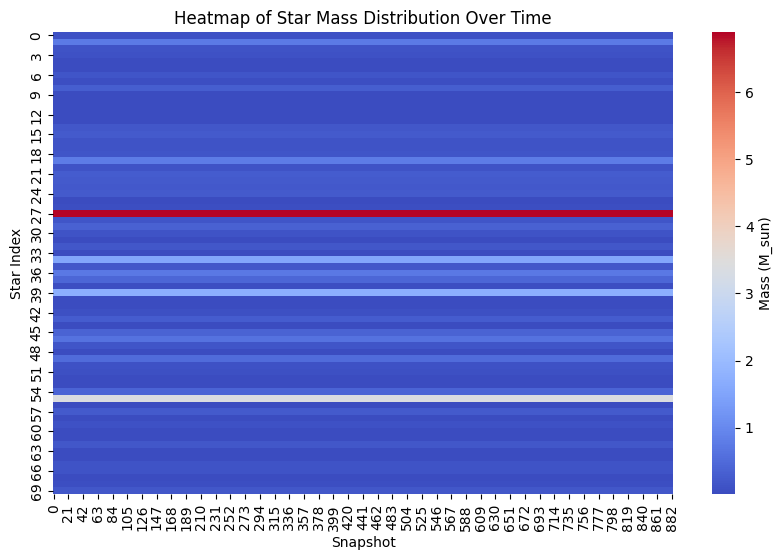

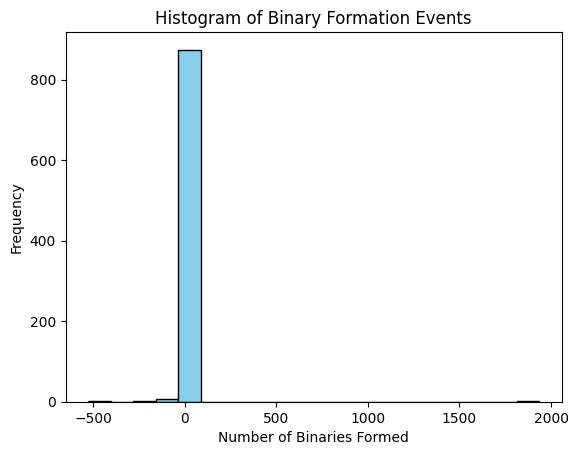

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from nbd_utils_code import nbd_read   # Assuming you have a module for reading snapshots

# Path to the snapshot directory
snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir'

# Get a sorted list of snapshot files
snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

# Initialize time series lists to hold data across snapshots
times = []
binary_counts = []
mass_distributions = []

# Helper function to calculate distance
def calculate_distance(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

# Method to identify binaries
def identify_binaries(x, y, z, vx, vy, vz, m, G=4.4969032492703040E-015):
    binaries = []
    for i in range(len(m)):
        for j in range(i+1, len(m)):
            r_ij = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
            v_ij = np.sqrt((vx[i] - vx[j])**2 + (vy[i] - vy[j])**2 + (vz[i] - vz[j])**2)
            mu = m[i] * m[j] / (m[i] + m[j])
            E_bind = 0.5 * mu * v_ij**2 - G * m[i] * m[j] / r_ij
            if E_bind < 0:
                binaries.append((i, j))
    return len(binaries)

# Main loop to read snapshots and analyze data
previous_binary_count = 0
for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)
    
    # Extract time and positions
    times.append(data.time)
    x, y, z = data.x, data.y, data.z
    vx, vy, vz = data.vx, data.vy, data.vz
    m = data.mass

    # Count binaries in current snapshot
    current_binary_count = identify_binaries(x, y, z, vx, vy, vz, m)
    binaries_formed = current_binary_count - previous_binary_count
    binary_counts.append(binaries_formed)
    previous_binary_count = current_binary_count

    # Print the number of binaries and the number formed since last snapshot
    print(f"Time: {data.time:.2f} Myr, Total Binaries: {current_binary_count}, Binaries Formed Since Last Snapshot: {binaries_formed}")

    # Collect mass distribution data for heatmap plotting
    mass_distributions.append(m)

# Calculate cumulative number of binaries formed
cumulative_binaries = np.cumsum(binary_counts)

# Plotting the results over time

# 3D Spatial Distribution Plot
def plot_3d_distribution(x, y, z, times):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=times, cmap='viridis', s=5, alpha=0.7)
    fig.colorbar(scatter, ax=ax, label='Time (Myr)')
    ax.set_xlabel('X Position (pc)')
    ax.set_ylabel('Y Position (pc)')
    ax.set_zlabel('Z Position (pc)')
    plt.title('3D Spatial Distribution of Stars')
    plt.show()

# Heatmap of Mass Distribution
def plot_mass_heatmap(mass_distributions, times):
    mass_array = np.array(mass_distributions)
    plt.figure(figsize=(10, 6))
    sns.heatmap(mass_array.T, cmap='coolwarm', cbar_kws={'label': 'Mass (M_sun)'})
    plt.xlabel('Snapshot')
    plt.ylabel('Star Index')
    plt.title('Heatmap of Star Mass Distribution Over Time')
    plt.show()

# Binary Formation Histogram
def plot_binary_formation_histogram(binary_counts):
    plt.figure()
    plt.hist(binary_counts, bins=20, edgecolor='black', color='skyblue')
    plt.xlabel('Number of Binaries Formed')
    plt.ylabel('Frequency')
    plt.title('Histogram of Binary Formation Events')
    plt.show()

# Cumulative Number of Binaries Formed
plt.figure()
plt.plot(times, cumulative_binaries, '-o', label="Cumulative Number of Binaries")
plt.xlabel("Time (Myr)")
plt.ylabel("Cumulative Number of Binaries")
plt.title("Cumulative Number of Binaries Formed Over Time")
plt.legend()
plt.show()

# Example plots for the latest snapshot
if len(times) > 0:
    last_data = nbd_read(os.path.join(snapshot_directory, snapshot_files[-1]))
    plot_3d_distribution(last_data.x, last_data.y, last_data.z, [last_data.time]*len(last_data.x))
    plot_mass_heatmap(mass_distributions, times)
    plot_binary_formation_histogram(binary_counts)


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0000
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 200000.00 Myr, Total Binaries: 1313, Binaries Formed Since Last Snapshot: 1313
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0001
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 400000.00 Myr, Total Binaries: 734, Binaries Formed Since Last Snapshot: -579
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0002
N =  70
time 600000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 600000.00 Myr, Total Binaries: 467, Binaries Formed Since Last Snapshot: -267
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0003
N =  70
time 800000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 800000.00 Myr, Total Binaries

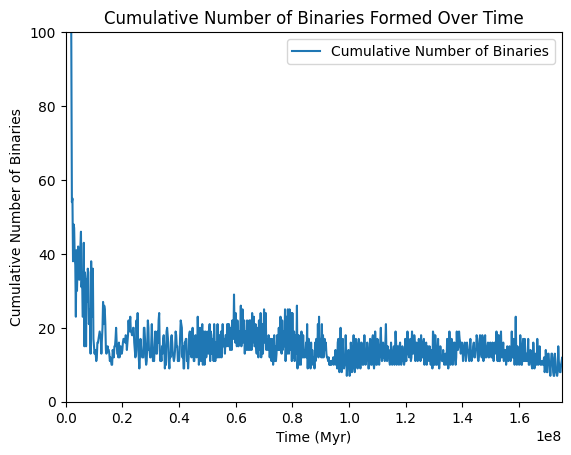

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read   


snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir'


snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])


times = []
binary_counts = []


def calculate_distance(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

def identify_binaries(x, y, z, vx, vy, vz, m, G=4.4969032492703040E-015):
    binaries = []
    for i in range(len(m)):
        for j in range(i+1, len(m)):
            r_ij = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
            v_ij = np.sqrt((vx[i] - vx[j])**2 + (vy[i] - vy[j])**2 + (vz[i] - vz[j])**2)
            mu = m[i] * m[j] / (m[i] + m[j])
            E_bind = 0.5 * mu * v_ij**2 - G * m[i] * m[j] / r_ij
            if E_bind < 0:
                binaries.append((i, j))
    return len(binaries)


previous_binary_count = 0
for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)
    
    times.append(data.time)
    x, y, z = data.x, data.y, data.z
    vx, vy, vz = data.vx, data.vy, data.vz
    m = data.mass

    current_binary_count = identify_binaries(x, y, z, vx, vy, vz, m)
    binaries_formed = current_binary_count - previous_binary_count
    binary_counts.append(binaries_formed)
    previous_binary_count = current_binary_count

    print(f"Time: {data.time:.2f} Myr, Total Binaries: {current_binary_count}, Binaries Formed Since Last Snapshot: {binaries_formed}")

cumulative_binaries = np.cumsum(binary_counts)

plt.figure()
plt.plot(times, cumulative_binaries, label="Cumulative Number of Binaries")
plt.ylim(0,100)
plt.xlim(0, 1.75e8)
plt.xlabel("Time (Myr)")
plt.ylabel("Cumulative Number of Binaries")
plt.title("Cumulative Number of Binaries Formed Over Time")
plt.legend()
plt.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

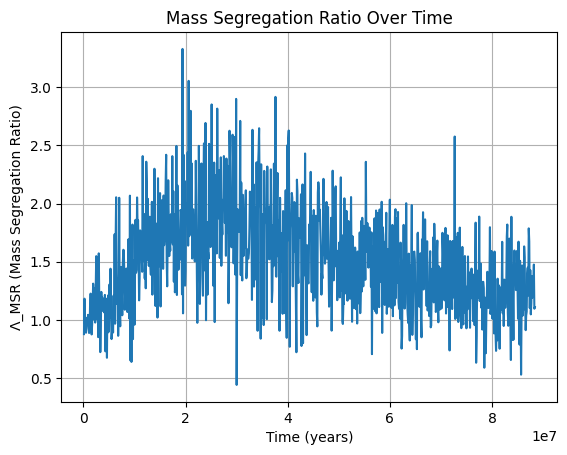

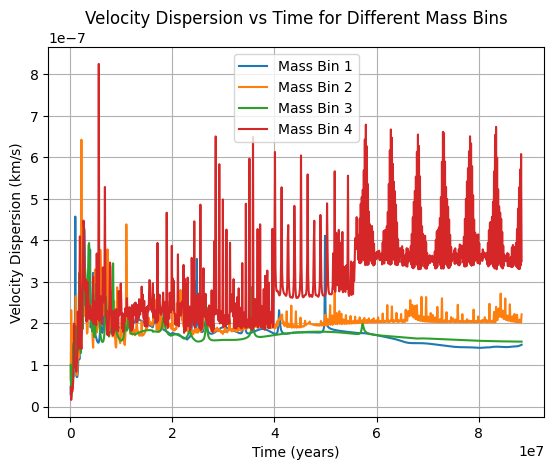

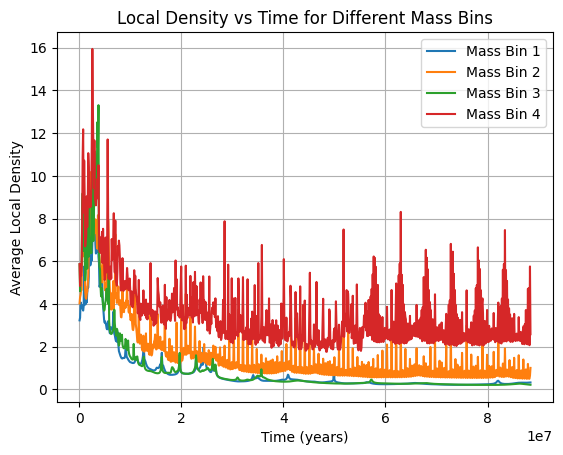

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.spatial import KDTree
from scipy.sparse.csgraph import minimum_spanning_tree
from nbd_utils_code import nbd_read  # Import your N-body data reading function

# Constants
G = 4.4969032492703040E-015  # Internal gravitational constant in pc, years, cm

# Function to calculate the minimum spanning tree length
def calculate_mst_length(positions):
    dist_matrix = distance_matrix(positions, positions)
    mst = minimum_spanning_tree(dist_matrix)
    mst_length = mst.toarray().astype(float).sum()
    return mst_length

# Function to compute radial distances of stars from the cluster center
def calculate_radial_distances(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

# Read the snapshot files
snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir'
snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

times = []
all_data = []

for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)

    times.append(data.time)
    all_data.append(data)

# Analyze mass segregation for each snapshot
for idx, data in enumerate(all_data):
    x, y, z = data.x, data.y, data.z
    m = data.mass
    vx, vy, vz = data.vx, data.vy, data.vz

    positions = np.vstack((x, y, z)).T
    velocities = np.vstack((vx, vy, vz)).T

    # Calculate radial distances of stars
    r = calculate_radial_distances(x, y, z)

    # --- Method 1: Mass Segregation Ratio (Λ_MSR) ---
    num_most_massive = 10  # e.g., top 10 most massive stars
    sorted_mass_indices = np.argsort(m)[-num_most_massive:]  # Indices of the most massive stars

    most_massive_positions = positions[sorted_mass_indices]
    random_sample_positions = positions[np.random.choice(len(positions), num_most_massive, replace=False)]

    mst_massive = calculate_mst_length(most_massive_positions)
    mst_random = calculate_mst_length(random_sample_positions)
    
    Λ_MSR = mst_random / mst_massive
    print(f"Snapshot {idx}, Time {times[idx]}: Λ_MSR = {Λ_MSR}")

    # --- Method 2: Radial Mass Segregation ---
    # Split stars into mass bins and calculate radial distances for each bin
    mass_bins = np.percentile(m, [25, 50, 75])  # 4 mass bins: low, medium, high, very high
    bin_indices = [m < mass_bins[0], (m >= mass_bins[0]) & (m < mass_bins[1]), (m >= mass_bins[1]) & (m < mass_bins[2]), m >= mass_bins[2]]

    # Plot cumulative radial distribution for each bin
    # plt.figure()
    # for i, bin_idx in enumerate(bin_indices):
    #     plt.hist(r[bin_idx], bins=20, cumulative=True, histtype='step', label=f'Mass Bin {i+1}')
    # plt.xlabel('Radial Distance (pc)')
    # plt.ylabel('Cumulative Number of Stars')
    # plt.legend()
    # plt.title(f'Radial Mass Segregation at Time {times[idx]}')
    # plt.show()

    # --- Method 3: Energy Equipartition (Velocity Dispersion) ---
    velocities_mag = np.linalg.norm(velocities, axis=1)
    velocity_dispersion = []

    for bin_idx in bin_indices:
        velocity_dispersion.append(np.std(velocities_mag[bin_idx]))

    mass_bin_centers = [(mass_bins[0] / 2), (mass_bins[0] + mass_bins[1]) / 2, (mass_bins[1] + mass_bins[2]) / 2, (mass_bins[2] + np.max(m)) / 2]

    # plt.figure()
    # plt.plot(mass_bin_centers, velocity_dispersion, 'o-')
    # plt.xlabel('Mass (Solar Masses)')
    # plt.ylabel('Velocity Dispersion (km/s)')
    # plt.title(f'Velocity Dispersion vs Mass at Time {times[idx]}')
    # plt.show()

    # --- Method 4: Local Density Mass Segregation ---
    kdtree = KDTree(positions)
    local_densities = []

    for i, pos in enumerate(positions):
        dist, idxs = kdtree.query(pos, k=6)  # Find the 5 nearest neighbors
        local_density = np.mean(1 / dist[1:])  # Inverse distance as proxy for density
        local_densities.append(local_density)

    # Split local densities into mass bins and compare
    # plt.figure()
    # for i, bin_idx in enumerate(bin_indices):
    #     plt.hist(np.array(local_densities)[bin_idx], bins=20, alpha=0.5, label=f'Mass Bin {i+1}')
    # plt.xlabel('Local Density')
    # plt.ylabel('Number of Stars')
    # plt.legend()
    # plt.title(f'Local Density Distribution at Time {times[idx]}')
    # plt.show()

# Initialize lists to track metrics over time
Λ_MSR_over_time = []
time_list = []
velocity_dispersion_over_time = {i: [] for i in range(4)}  # 4 mass bins
local_density_over_time = {i: [] for i in range(4)}  # 4 mass bins

for idx, data in enumerate(all_data):
    x, y, z = data.x, data.y, data.z
    m = data.mass
    vx, vy, vz = data.vx, data.vy, data.vz

    positions = np.vstack((x, y, z)).T
    velocities = np.vstack((vx, vy, vz)).T
    r = calculate_radial_distances(x, y, z)

    # Time evolution
    time_list.append(times[idx])

    # --- Method 1: Mass Segregation Ratio (Λ_MSR) ---
    num_most_massive = 10  # e.g., top 10 most massive stars
    sorted_mass_indices = np.argsort(m)[-num_most_massive:]
    most_massive_positions = positions[sorted_mass_indices]
    random_sample_positions = positions[np.random.choice(len(positions), num_most_massive, replace=False)]

    mst_massive = calculate_mst_length(most_massive_positions)
    mst_random = calculate_mst_length(random_sample_positions)
    
    Λ_MSR = mst_random / mst_massive
    Λ_MSR_over_time.append(Λ_MSR)

    # --- Method 2: Radial Mass Segregation ---
    mass_bins = np.percentile(m, [25, 50, 75])
    bin_indices = [m < mass_bins[0], (m >= mass_bins[0]) & (m < mass_bins[1]), (m >= mass_bins[1]) & (m < mass_bins[2]), m >= mass_bins[2]]

    # --- Method 3: Energy Equipartition (Velocity Dispersion) ---
    velocities_mag = np.linalg.norm(velocities, axis=1)
    for i, bin_idx in enumerate(bin_indices):
        velocity_dispersion_over_time[i].append(np.std(velocities_mag[bin_idx]))

    # --- Method 4: Local Density Mass Segregation ---
    kdtree = KDTree(positions)
    local_densities = []

    for i, pos in enumerate(positions):
        dist, idxs = kdtree.query(pos, k=6)  # Find 5 nearest neighbors
        local_density = np.mean(1 / dist[1:])
        local_densities.append(local_density)

    # Split local densities into mass bins and track over time
    for i, bin_idx in enumerate(bin_indices):
        local_density_over_time[i].append(np.mean(np.array(local_densities)[bin_idx]))

# --- Plotting the results ---

# Plot 1: Mass Segregation Ratio (Λ_MSR) Over Time
plt.figure()
plt.plot(time_list, Λ_MSR_over_time)
plt.xlabel('Time (years)')
plt.ylabel('Λ_MSR (Mass Segregation Ratio)')
plt.title('Mass Segregation Ratio Over Time')
plt.grid(True)
plt.show()

# Plot 2: Velocity Dispersion Over Time for Different Mass Bins
plt.figure()
for i in range(4):  # 4 mass bins
    plt.plot(time_list, velocity_dispersion_over_time[i], label=f'Mass Bin {i+1}')
plt.xlabel('Time (years)')
plt.ylabel('Velocity Dispersion (km/s)')
plt.title('Velocity Dispersion vs Time for Different Mass Bins')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Local Density Over Time for Different Mass Bins
plt.figure()
for i in range(4):
    plt.plot(time_list, local_density_over_time[i], label=f'Mass Bin {i+1}')
plt.xlabel('Time (years)')
plt.ylabel('Average Local Density')
plt.title('Local Density vs Time for Different Mass Bins')
plt.legend()
plt.grid(True)
plt.show()



Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

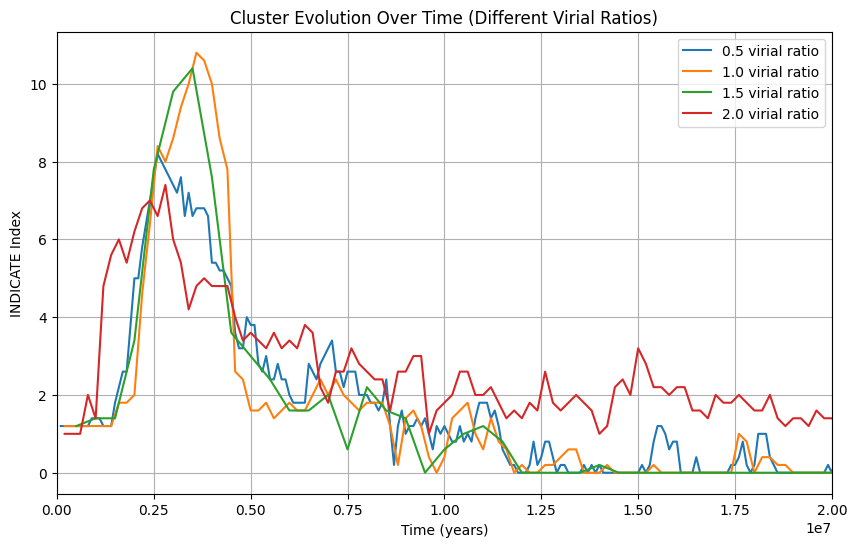

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from nbd_utils_code import nbd_read  


cluster_radius = 0.5  
n_neighbors = 5  


simulation_directories = {
    '0.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir',
    '1.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_125Mev_1.0vir',
    '1.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir',
    '2.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_52M_120Mev_2.0vir'
}


def generate_control_distribution(N, radius):
    phi = np.random.uniform(0, 2 * np.pi, N)
    costheta = np.random.uniform(-1, 1, N)
    u = np.random.uniform(0, 1, N)

    theta = np.arccos(costheta)
    r = radius * u ** (1/3)  
    
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    
    return np.vstack((x, y, z)).T


def nearest_neighbors(positions, n_neighbors=5):
    tree = cKDTree(positions)
    distances, _ = tree.query(positions, k=n_neighbors)
    return distances[:, n_neighbors-1]  


def mean_neighbor_distance(control_positions, n_neighbors=5):
    tree = cKDTree(control_positions)
    distances, _ = tree.query(control_positions, k=n_neighbors)
    return np.mean(distances[:, n_neighbors-1])

def calculate_indicate_index(positions, control_positions, n_neighbors=5):
    mean_dist = mean_neighbor_distance(control_positions, n_neighbors)
    nearest_dist = nearest_neighbors(positions, n_neighbors)
    
    
    counts = np.sum(nearest_dist < mean_dist)
    index = counts / n_neighbors
    return index

simulation_results = {}

for label, snapshot_directory in simulation_directories.items():
    snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

    indicate_results = []  

    for snapshot_file in snapshot_files:
        filepath = os.path.join(snapshot_directory, snapshot_file)
        data = nbd_read(filepath) 
        
        positions = np.vstack((data.x, data.y, data.z)).T 
        
        control_positions = generate_control_distribution(len(positions), cluster_radius)
        
        indicate_value = calculate_indicate_index(positions, control_positions, n_neighbors)
        
        indicate_results.append((data.time, indicate_value))
    
    indicate_results = sorted(indicate_results, key=lambda x: x[0])
    
    simulation_results[label] = indicate_results

plt.figure(figsize=(10, 6))

for label, results in simulation_results.items():
    times, indicate_values = zip(*results)
    plt.plot(times, indicate_values, linestyle='-', label=label)

plt.xlim(0, 20e6)

plt.xlabel('Time (years)')
plt.ylabel('INDICATE Index')
plt.title('Cluster Evolution Over Time (Different Virial Ratios)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir0.5\cluster_s1t1_0000
N =  70
time 2000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir0.5\cluster_s1t1_0001
N =  70
time 4000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir0.5\cluster_s1t1_0002
N =  70
time 6000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir0.5\cluster_s1t1_0003
N =  70
time 8000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir0.5\cluster_s1t1_0004
N =  70
time 10000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir0.5\cluster_s1t1_0005

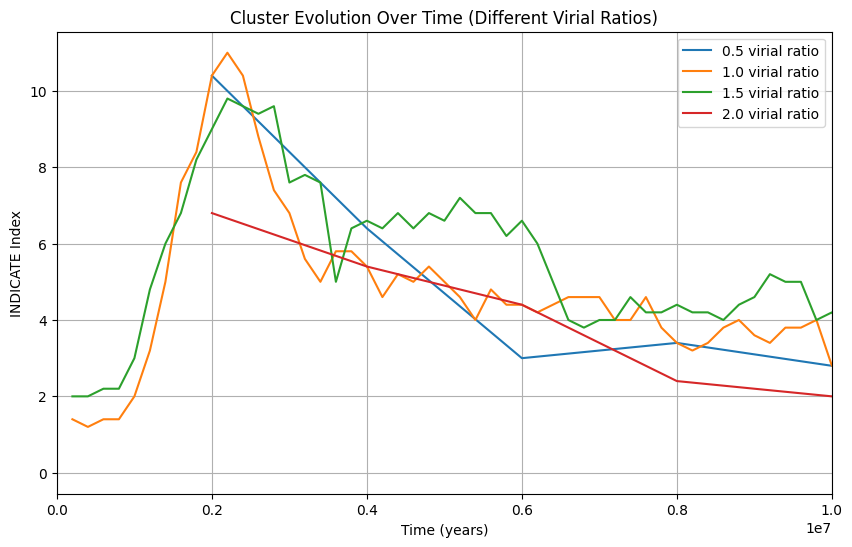

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from nbd_utils_code import nbd_read  


cluster_radius = 0.5  
n_neighbors = 5  


simulation_directories = {
    '0.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir0.5',
    '1.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir1.0',
    '1.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir1.5',
    '2.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_1.0\out_rad1.0_vir2.0'
}


def generate_control_distribution(N, radius):
    phi = np.random.uniform(0, 2 * np.pi, N)
    costheta = np.random.uniform(-1, 1, N)
    u = np.random.uniform(0, 1, N)

    theta = np.arccos(costheta)
    r = radius * u ** (1/3)  
    
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    
    return np.vstack((x, y, z)).T


def nearest_neighbors(positions, n_neighbors=5):
    tree = cKDTree(positions)
    distances, _ = tree.query(positions, k=n_neighbors)
    return distances[:, n_neighbors-1]  


def mean_neighbor_distance(control_positions, n_neighbors=5):
    tree = cKDTree(control_positions)
    distances, _ = tree.query(control_positions, k=n_neighbors)
    return np.mean(distances[:, n_neighbors-1])

def calculate_indicate_index(positions, control_positions, n_neighbors=5):
    mean_dist = mean_neighbor_distance(control_positions, n_neighbors)
    nearest_dist = nearest_neighbors(positions, n_neighbors)
    
    
    counts = np.sum(nearest_dist < mean_dist)
    index = counts / n_neighbors
    return index

simulation_results = {}

for label, snapshot_directory in simulation_directories.items():
    snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

    indicate_results = []  

    for snapshot_file in snapshot_files:
        filepath = os.path.join(snapshot_directory, snapshot_file)
        data = nbd_read(filepath) 
        
        positions = np.vstack((data.x, data.y, data.z)).T 
        
        control_positions = generate_control_distribution(len(positions), cluster_radius)
        
        indicate_value = calculate_indicate_index(positions, control_positions, n_neighbors)
        
        indicate_results.append((data.time, indicate_value))
    
    indicate_results = sorted(indicate_results, key=lambda x: x[0])
    
    simulation_results[label] = indicate_results

plt.figure(figsize=(10, 6))

for label, results in simulation_results.items():
    times, indicate_values = zip(*results)
    plt.plot(times, indicate_values, linestyle='-', label=label)

plt.xlim(0, 1e7)

plt.xlabel('Time (years)')
plt.ylabel('INDICATE Index')
plt.title('Cluster Evolution Over Time (Different Virial Ratios)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [7]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.spatial import cKDTree
from nbd_utils_code import nbd_read  

# Define the directory containing the snapshots
snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\output_24M_7M'

# List all snapshot files
snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

# Define the k value for the nearest neighbor calculation
k = 5  # The first nearest neighbor is the point itself, so k=2 means the first true neighbor

# Initialize a list to store distances for selected snapshots
distances_data = []

# Process every 100th snapshot
for i, snapshot_file in enumerate(snapshot_files):
    if i % 100 == 0:  # Select every 100th snapshot
        filepath = os.path.join(snapshot_directory, snapshot_file)
        data = nbd_read(filepath)

        # Get the time of the snapshot
        time = data.time

        # Get positions of particles
        x, y, z = data.x, data.y, data.z
        positions = np.column_stack((x, y, z))

        # Build a KDTree for the current snapshot
        tree = cKDTree(positions)

        # Query the k-nearest neighbors (k=2 for 1st true neighbor)
        distances, _ = tree.query(positions, k=k)
        
        # Extract the distance to the nearest neighbor (ignoring self-distance at index 0)
        nearest_neighbor_distances = distances[:, 1]

        # Store the distances with snapshot number
        distances_data.extend([{
            'Time': time,
            'Nearest Neighbor Distance': distance
        } for distance in nearest_neighbor_distances])

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(distances_data)

# Create the box-and-whisker plot using Plotly Express
fig = px.box(df, x="Time", y="Nearest Neighbor Distance", 
             title="Box-and-Whisker Plot of Nearest Neighbor Distances Over Time",
             labels={"Time": "Time", "Nearest Neighbor Distance": "Distance"},
             points="all")  # Include all points

# Show the plot
fig.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\output_24M_7M\cluster0000
N =  70
time 10000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\output_24M_7M\cluster0100
N =  70
time 1010000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\output_24M_7M\cluster0200
N =  70
time 2010000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\output_24M_7M\cluster0300
N =  70
time 3010000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\output_24M_7M\cluster0400
N =  70
time 4010000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\output_24M_7M\cluster0500
N =  70
time 5010000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Deskt